In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.config import get_dataset_and_user
from src.user import DummyUser
%matplotlib inline

In [3]:
# get data
X_iris, user_iris = get_dataset_and_user('iris')
y_iris = user_iris.get_label(X_iris, update_counter=False)

X_housing, user_housing = get_dataset_and_user('housing')
y_housing = user_housing.get_label(X_housing, update_counter=False)

X_sdss, user_sdss = get_dataset_and_user('sdss_Q2.1')

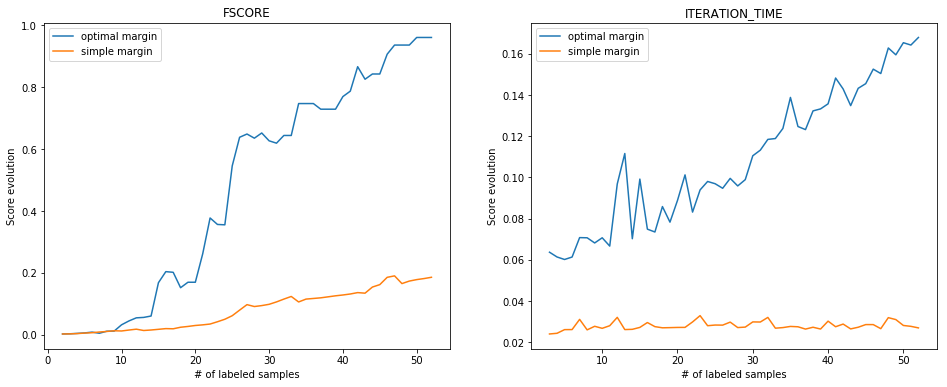

In [5]:
from src.active_learning.svm import SimpleMargin, SolverMethod, OptimalMargin
from src.active_learning.linear import LinearMajorityVote, KernelMajorityVote
from src.active_learning.agnostic import RandomLearner
from src.showdown import Showdown
from src.plotting import plot_showdown
from src.initial_sampling import StratifiedSampler
from sklearn.svm import SVC

user_housing.max_iter = 35
user_iris.max_iter = 10
user_sdss.max_iter = 50

active_learners_list = [
    #("random", RandomLearner(SVC(C=1000, kernel='rbf', class_weight='balanced'))),
    ("optimal margin", OptimalMargin(chain_length=25, sample_size=16, kind='kernel', kernel='rbf', C=100000)),
    ("simple margin", SimpleMargin(kind='kernel', kernel='rbf', C=100000)),
]

datasets_list = [
    ('sdss', X_sdss, user_sdss)
    #("housing", X_housing, user_housing),
    #("iris", X_iris, user_iris)
]
times = 1
showdown = Showdown()
output = showdown.run(datasets_list, active_learners_list, times, StratifiedSampler(1,1))

#print(output.head())
plot_showdown(output, times, metrics_list=['fscore', 'iteration_time'])

In [6]:
output['sdss']['fscore']

optimal margin                          simple margin                      \
              max      mean       min  std           max      mean       min   
2        0.002931  0.002931  0.002931  0.0      0.002931  0.002931  0.002931   
3        0.003548  0.003548  0.003548  0.0      0.003221  0.003221  0.003221   
4        0.004816  0.004816  0.004816  0.0      0.004193  0.004193  0.004193   
5        0.006320  0.006320  0.006320  0.0      0.005826  0.005826  0.005826   
6        0.008875  0.008875  0.008875  0.0      0.007013  0.007013  0.007013   
7        0.005300  0.005300  0.005300  0.0      0.009237  0.009237  0.009237   
8        0.011838  0.011838  0.011838  0.0      0.011020  0.011020  0.011020   
9        0.012228  0.012228  0.012228  0.0      0.013256  0.013256  0.013256   
10       0.032537  0.032537  0.032537  0.0      0.012591  0.012591  0.012591   
11       0.044991  0.044991  0.044991  0.0      0.015629  0.015629  0.015629   
12       0.055006  0.055006  0.055006  0.0      0.018417  0.018417  0.018417   
13       0.056388  0.056388  0.056388  0.0      0.014151  0.014151  0.014151   
14       0.060865  0.060865  0.060865  0.0      0.015767  0.015767  0.015767   
15       0.168421  0.168421  0.168421  0.0      0.017957  0.017957  0.017957   
16       0.204147  0.204147  0.204147  0.0      0.020244  0.020244  0.020244   
17       0.201987  0.201987  0.201987  0.0      0.019659  0.019659  0.019659   
18       0.152284  0.152284  0.152284  0.0      0.024644  0.024644  0.024644   
19       0.169912  0.169912  0.169912  0.0      0.027240  0.027240  0.027240   
20       0.169912  0.169912  0.169912  0.0      0.030346  0.030346  0.030346   
21       0.261780  0.261780  0.261780  0.0      0.032364  0.032364  0.032364   
22       0.377358  0.377358  0.377358  0.0      0.034992  0.034992  0.034992   
23       0.356436  0.356436  0.356436  0.0      0.042384  0.042384  0.042384   
24       0.355263  0.355263  0.355263  0.0      0.050453  0.050453  0.050453   
25       0.545455  0.545455  0.545455  0.0      0.061896  0.061896  0.061896   
26       0.637838  0.637838  0.637838  0.0      0.079900  0.079900  0.079900   
27       0.648352  0.648352  0.648352  0.0      0.097635  0.097635  0.097635   
28       0.634921  0.634921  0.634921  0.0      0.091494  0.091494  0.091494   
29       0.651685  0.651685  0.651685  0.0      0.094535  0.094535  0.094535   
30       0.626374  0.626374  0.626374  0.0      0.098689  0.098689  0.098689   
31       0.618785  0.618785  0.618785  0.0      0.106401  0.106401  0.106401   
32       0.643678  0.643678  0.643678  0.0      0.115523  0.115523  0.115523   
33       0.643678  0.643678  0.643678  0.0      0.124031  0.124031  0.124031   
34       0.746667  0.746667  0.746667  0.0      0.106255  0.106255  0.106255   
35       0.746667  0.746667  0.746667  0.0      0.115523  0.115523  0.115523   
36       0.746667  0.746667  0.746667  0.0      0.117539  0.117539  0.117539   
37       0.728477  0.728477  0.728477  0.0      0.119626  0.119626  0.119626   
38       0.728477  0.728477  0.728477  0.0      0.122841  0.122841  0.122841   
39       0.728477  0.728477  0.728477  0.0      0.126108  0.126108  0.126108   
40       0.769231  0.769231  0.769231  0.0      0.128773  0.128773  0.128773   
41       0.786667  0.786667  0.786667  0.0      0.131959  0.131959  0.131959   
42       0.865672  0.865672  0.865672  0.0      0.136461  0.136461  0.136461   
43       0.825175  0.825175  0.825175  0.0      0.134636  0.134636  0.134636   
44       0.842105  0.842105  0.842105  0.0      0.154403  0.154403  0.154403   
45       0.842105  0.842105  0.842105  0.0      0.162231  0.162231  0.162231   
46       0.905983  0.905983  0.905983  0.0      0.185776  0.185776  0.185776   
47       0.935484  0.935484  0.935484  0.0      0.190476  0.190476  0.190476   
48       0.935484  0.935484  0.935484  0.0      0.165589  0.165589  0.165589   
49       0.935484  0.935484  0.935484  0.0      0.173669  0.173669  0.173669   
50 

In [ ]:
from datetime import datetime

def point_parser(s):
    s = s[1:-1]  # remove square brackets
    arrays = s.split('\n')
    arrays_without_brackets = map(lambda x: x.strip()[1:-1], arrays)
    final = list(map(lambda x: [float(y) for y in x.split()], arrays_without_brackets))
    return final[0]

def parse_log(path='task.log'):
    with open(path, 'r') as f:
        for line in f:
            timestamp, _, _, _, iteration, point, label = line.strip().split('\t')
            timestamp = datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S,%f").timestamp()
            point = point_parser(point)
            label = float(label)
            iteration = int(iteration)
            yield timestamp, iteration, point, label

logs = parse_log()            
t0, i0, x0, l0 = next(logs)
points = []
labels = []
for t, i, x, l in logs:
    points.append(x)
    labels.append(l)
    if i != i0:
        i0 = i
        # compute metrics
        pass

print(points)
print(labels)